# Project 5

In [2]:
pip install tensorflow keras opencv-python

Note: you may need to restart the kernel to use updated packages.


# Imports

In [4]:
# general i.o & math imports
import cv2 as cv
import os
import numpy as np
import pandas as pd

# nn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

# Introducing our Rice Types

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
imgArb = mpimg.imread("riceImagesSmall/Arborio/Arborio (1).jpg")
imgBas = mpimg.imread("riceImagesSmall/Basmati/Basmati (1).jpg")
imgIps = mpimg.imread("riceImagesSmall/Ipsala/Ipsala (1).jpg")
imgJas = mpimg.imread("riceImagesSmall/Jasmine/Jasmine (1).jpg")
imgKar = mpimg.imread("riceImagesSmall/Karacadag/Karacadag (1).jpg")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/devamin/Desktop/3162-FinalProject/riceImages/Arborio/Arborio (1).jpg'

## Arborio Rice

Arborio rice is an Italian short-grain rice that is characterized by it's short, fat, and slightly oval shaped grains. On average a grain is about 5 mm in length

In [ ]:
plt.imshow(imgArb)
plt.axis('off')
plt.show()

## Basmati Rice

Basmati rice is traditionally grown in the Indian subontinent, and is characterized by its long thin shape. It is typically around 6.61 mm in length, and about 2 mm in girth.

In [ ]:
plt.imshow(imgBas)
plt.axis('off')
plt.show()

## Jasmine Rice

Jasmine rice is grown primarily in areas of Southeast Asia, such as Thailand, Cambodia, Laos, and Vietnam. Typically it is around 7 mm in length. 

In [ ]:
plt.imshow(imgJas)
plt.axis('off')
plt.show()

## Ipsala Rice

Ipsala rice (also known as Baldo rice) is a short-grain rice grown in Italy and Turkey. It is typically around 7 mm in length, and 3 mm in width.

In [ ]:
plt.imshow(imgIps)
plt.axis('off')
plt.show()

## Karacadag Rice

Karacadag Rice grains are typically 4-6 mm long, and 3-4 mm wide. It hails from the South-Eastern Anatolia region of Turkey, and is named after the dormant volcano located there.

In [ ]:
plt.imshow(imgKar)
plt.axis('off')
plt.show()

# Constants

In [ ]:
SCALED_IMG_SIZE = (128, 128)
BASE_PATH = "riceImages"
NORMALIZATION_SCALE = 255.0

The code below requires that the rice images be in seperate folders in one directory that is in the same directory as the notebook. i.e.

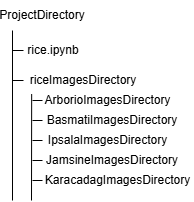

# Pre-processing

The dataset contains images of rice placed against a black background. Each class of rice ("Arborio", "Basmati", etc.) are organized into separate folders, each containing 1,000* images. Our goal here is to preprocess these images and their labels to make them suitable for training a machine learning model.

*The original dataset had far more, but we brought them down to a realistic proportion for us to work against.

In [ ]:
data = []   # holds the image data (processed, resized, & normalized as numpy arrays)
labels = [] # holds the original string labels (like "Arborio", "Basmati") for each img

for label in os.listdir(BASE_PATH):
    folder_path = os.path.join(BASE_PATH, label)
    
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            
            image = cv.imread(image_path)
            
            if image is not None:
                image = cv.resize(image, SCALED_IMG_SIZE)
                
                # normalize image to 0, 1
                image = image / NORMALIZATION_SCALE
                
                data.append(image)
                labels.append(label)

# convert the data list to a numpy array
data = np.array(data)
labels = np.array(labels)

# label to int mapping
# i.e., mapping might look like this...
# "Arborio" ->   0
# "Basmati" ->   1
# "Ipsala" ->    2
# "Jasmine" ->   3
# "Karacadag" -> 4
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels_encoded, test_size=0.2)

# df
df = pd.DataFrame(list(zip(labels, labels_encoded)), columns=["label", "encoded_label"])

We first loop through each subfolder representing the rice varieties or labels within the main riceImages directory. For each label folder, we then read each image. The images are read using OpenCV (cv.imread()), which loads the image in its original format.

Each image is resized to a consistent size of 128x128 pixels using OpenCV’s cv.resize(). We're doing this since neural networks prefer when the images match aspect ratios & dimensions as input.

After resizing the image, we normalize the pixel values by dividing the pixel values by 255. This makes sure values are in the range of (0-1). Normalizing the image is also good for helping the model learn more effectively since neural networks tend to converge faster when input data is scaled.

# Modeling (just an example from pre-processing & actually using the data I worked on)

In [ ]:
# VVV using tensorflow.keras.models here VVV
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))  # 5 classes (may be good just to use the len of labels lol)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Define parameters
image_size = (128, 128)
batch_size = 32
epochs = 10

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,   # Normalize pixel values
    validation_split=0.2 # Split dataset into training and validation
)

# Training and validation data generators
train_generator = datagen.flow_from_directory(
    'riceImagesSmall', # Replace with your dataset path
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'riceImagesSmall', # Replace with your dataset path
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# Evaluate the model
val_generator.reset()  # Ensure generator starts from the beginning
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

# Compute F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score:", f1)

# Classification report
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))


Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 355ms/step - accuracy: 0.7059 - loss: 0.7268 - val_accuracy: 0.9750 - val_loss: 0.0842
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - accuracy: 0.9569 - loss: 0.1205 - val_accuracy: 0.9610 - val_loss: 0.1207
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 355ms/step - accuracy: 0.9644 - loss: 0.1156 - val_accuracy: 0.9740 - val_loss: 0.0859
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - accuracy: 0.9700 - loss: 0.0934 - val_accuracy: 0.9790 - val_loss: 0.0683
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 322ms/step - accuracy: 0.9764 - loss: 0.0661 - val_accuracy: 0.9850 - val_loss: 0.0508
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 314ms/step - accuracy: 0.9778 - loss: 0.0681 - val_accuracy: 0.9760 - val_loss: 0.0722
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 316ms/step - accuracy: 0.9762 - loss: 0.0624 - val_accuracy: 0.9730 - val_loss: 0.0867
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 318ms/step - accuracy: 0.9784 - loss: 0

The model achieves excellent classification performance across five rice types, with an overall accuracy of 98%.

## Key Observations:


    Class-Specific Performance:

        Basmati and Ipsala have perfect recall and F1-scores, showing no misclassifications.
        Arborio and Karacadag have slightly lower recall (0.96 and 0.98), indicating minor misclassifications.
        
    Overall Performance:

        Precision, recall, and F1-scores are consistently high (0.97–1.00) across all classes.
        Macro and weighted averages are both 0.98, confirming balanced performance across all rice types.
        
    Model Robustness:

    The model demonstrates excellent generalization with 98% accuracy on the validation set, indicating readiness for practical applications.

## Model Visualization

Below we'll be making a visualization of how model works. 

There are a few ways we can do this, but we'll be using visualkeras this time.

In [ ]:
import visualkeras

In [ ]:
visualkeras.layered_view(model)

Each block in our above visualization of our model corresponds to a layer or operation in our model. The layout helps illustrate the flow of data through our Neural Network and how it condenses as it progresses through it.
The first layer is our input data, which has a high number of input images. 

Layer 1: conv2d - this is where our model learns spacial hierarchies of patterns such as edges, textures, or more complex features in our images.
Layer 2: maxpooling2d - this reduces the spatial dimensions of our input data, reducing the computational cost while retaining the most important information from our input data
Layers 3 - 6 repeat the first two steps a couple more times.
Layer 7: flatten
Layer 8: dense
Layer 9: dropout
Layer 10: dense



